In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Dataset_ML_Limpio_V1.csv")
df.head()

,year,selling_price,transmission,potencia_motor_hp,nivel_seguridad,score_calidad,eficiencia_km_l,calidad_auto_num
0,2007,60000,0,244,1.2,5.0,9.450009,1
1,2007,135000,0,376,2.1,6.6,9.450009,1
2,2012,600000,0,199,2.2,6.3,10.259988,1
3,2017,250000,0,302,2.4,6.7,11.610005,1
4,2014,450000,0,108,1.9,6.0,10.799963,1


In [3]:
X = df.drop(columns=["calidad_auto_num"])
y = df["calidad_auto_num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
modelo.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Baja", "Media", "Alta"]))

[0]	validation_0-mlogloss:0.70252	validation_1-mlogloss:0.70252
[1]	validation_0-mlogloss:0.47998	validation_1-mlogloss:0.47999
[2]	validation_0-mlogloss:0.33775	validation_1-mlogloss:0.33776
[3]	validation_0-mlogloss:0.24169	validation_1-mlogloss:0.24170
[4]	validation_0-mlogloss:0.17480	validation_1-mlogloss:0.17481
[5]	validation_0-mlogloss:0.12733	validation_1-mlogloss:0.12734
[6]	validation_0-mlogloss:0.09321	validation_1-mlogloss:0.09322
[7]	validation_0-mlogloss:0.06849	validation_1-mlogloss:0.06849
[8]	validation_0-mlogloss:0.05045	validation_1-mlogloss:0.05046
[9]	validation_0-mlogloss:0.03725	validation_1-mlogloss:0.03725
[10]	validation_0-mlogloss:0.02754	validation_1-mlogloss:0.02755
[11]	validation_0-mlogloss:0.02040	validation_1-mlogloss:0.02041
[12]	validation_0-mlogloss:0.01513	validation_1-mlogloss:0.01514
[13]	validation_0-mlogloss:0.01124	validation_1-mlogloss:0.01125
[14]	validation_0-mlogloss:0.00837	validation_1-mlogloss:0.00837
[15]	validation_0-mlogloss:0.00624	

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:29:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[37]	validation_0-mlogloss:0.00020	validation_1-mlogloss:0.00020
[38]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00020
[39]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00020
[40]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00020
[41]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00019
[42]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00019
[43]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00019
[44]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00019
[45]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00019
[46]	validation_0-mlogloss:0.00019	validation_1-mlogloss:0.00019
[47]	validation_0-mlogloss:0.00018	validation_1-mlogloss:0.00019
[48]	validation_0-mlogloss:0.00018	validation_1-mlogloss:0.00019
[49]	validation_0-mlogloss:0.00018	validation_1-mlogloss:0.00019
[50]	validation_0-mlogloss:0.00018	validation_1-mlogloss:0.00019
[51]	validation_0-mlogloss:0.00018	validation_1-mlogloss:0.00019
[52]	validation_0-mloglos

In [4]:
#Juntar los valores de test tanto de x como y en un Datafram
df_Prueba = pd.concat([X_test, y_test], axis=1)


#Dividir en dataframes distintos, categorizandolos por lo que son
baja = df_Prueba[df_Prueba["calidad_auto_num"] == 0]
media = df_Prueba[df_Prueba["calidad_auto_num"] == 1]
alta = df_Prueba[df_Prueba["calidad_auto_num"] == 2]

#Seleccionar el mismo numero de valores para test, por clasificacion
#De esta forma podemos evitar que nuestro grupo de Test_Data, tenga valores repetitivos
n = 110
baja_sample = baja.sample(n, random_state=42)
media_sample = media.sample(n, random_state=42)
alta_sample = alta.sample(n, random_state=42)

#Luego los combinamos nuevamente
df_balanceado = pd.concat([baja_sample, media_sample, alta_sample])

#Los separamos por variables y objetivo para poder utilizar en nuestro modelo
X_test_balanceado = df_balanceado.drop(columns=["calidad_auto_num"])
y_test_balanceado = df_balanceado["calidad_auto_num"]

#Predecimos y Evaluamos
y_pred = modelo.predict(X_test_balanceado)

print(classification_report(y_test_balanceado, y_pred, target_names=["Baja", "Media", "Alta"]))


              precision    recall  f1-score   support

        Baja       1.00      1.00      1.00       110
       Media       1.00      1.00      1.00       110
        Alta       1.00      1.00      1.00       110

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330



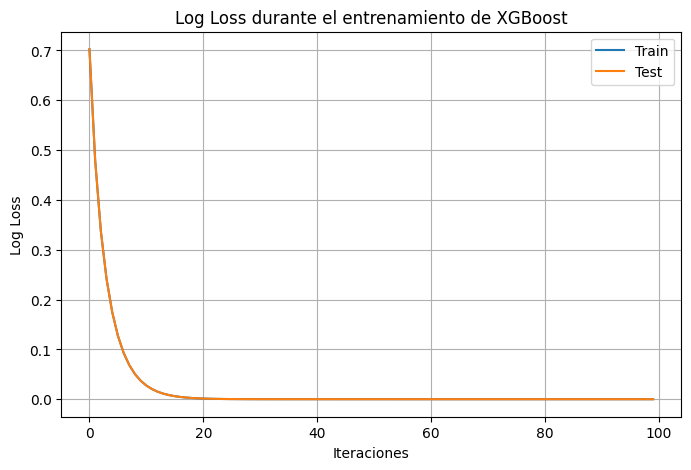

In [5]:
#Este valor lo obtenemos de nuestro evalset, guardando literalmente los resultados de cada evaluacion
eval_result = modelo.evals_result()

#Al tener como metrica de evaluacion a LogLoss la aprovechamos para graficar
epochs = len(eval_result['validation_0']['mlogloss'])
x_axis = range(epochs)

plt.figure(figsize=(8, 5))
plt.plot(x_axis, eval_result['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, eval_result['validation_1']['mlogloss'], label='Test')
plt.xlabel("Iteraciones"); plt.ylabel("Log Loss")
plt.title("Log Loss durante el entrenamiento de XGBoost")
plt.legend(); plt.grid(True)
plt.show()


In [6]:
import joblib

#Para Descargar el modelo
joblib.dump(modelo, "modelo_xgboost.pkl")

['modelo_xgboost.pkl']